<a href="https://colab.research.google.com/github/hariteja97/NLP/blob/master/Cardio_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
# select_file=input("enter the training dataset")
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [0]:
# dataset=pd.read_csv(select_file,sep=";",encoding="utf-8")
import io
dataset=pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']),sep=";",encoding="utf-8")

#Deleting the column ID which is not required.
dataset=dataset.drop(columns=['id'])



In [0]:
dataset=dataset.dropna(axis=0,how='any')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [0]:
S = dataset["ap_hi"]
S=S[~((S-S.mean()).abs() > 3*S.std())]


dataset["ap_hi"]=S


In [0]:
S=dataset["ap_lo"]
S=S[~((S-S.mean()).abs() > 3*S.std())]
dataset["ap_lo"]=S

In [0]:
# S=dataset["age"]
# S=S[~((S-S.mean()).abs() > 3*S.std())]
# dataset["age"]=S


In [0]:
stepframe=dataset["ap_hi"]

Q1 = stepframe.quantile(0.25)
Q3 = stepframe.quantile(0.75)
IQR = Q3 - Q1

dataset["ap_hi"] = stepframe[~((stepframe < (Q1 - 1.5 * IQR)) |(stepframe > (Q3 + 1.5 * IQR)))]


In [0]:
stepframe=dataset["ap_lo"]

Q1 = stepframe.quantile(0.25)
Q3 = stepframe.quantile(0.75)
IQR = Q3 - Q1

dataset["ap_lo"] = stepframe[~((stepframe < (Q1 - 1.5 * IQR)) |(stepframe > (Q3 + 1.5 * IQR)))]


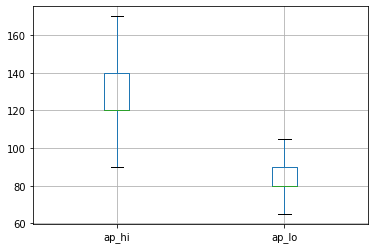

In [0]:


dataset.boxplot(column=["ap_hi","ap_lo"])


In [0]:
# import pandas as pd
# import numpy as np
# import seaborn as sns

# X = dataset.iloc[:,0:10]  #independent columns
# y = dataset.iloc[:,-1]    #target column i.e cardio
# #get correlations of each features in dataset
# corrmat = dataset.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(18,19))
# #plot heat map
# g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [0]:
# checking the percentage of missing values in each variable

dataset.isnull().sum()/len(dataset)*100

age            0.000000
gender         0.000000
height         0.000000
weight         0.000000
ap_hi          2.047590
ap_lo          6.614623
cholesterol    0.000000
gluc           0.000000
smoke          0.000000
alco           0.000000
active         0.000000
cardio         0.000000
dtype: float64

In [0]:
# saving missing values in a variable
a = dataset.isnull().sum()/len(dataset)*100
# saving column names in a variable
variables = dataset.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

In [0]:
dataset.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130.0,80.0,2,2,0,0,1,0
1,14648,1,163,71.0,110.0,70.0,1,1,0,0,1,1
2,21901,1,165,70.0,120.0,80.0,1,1,0,0,1,0
3,14549,2,165,85.0,120.0,80.0,1,1,1,1,1,0
4,23393,1,155,62.0,120.0,80.0,1,1,0,0,1,0


In [0]:
# dataset['weight'].fillna(dataset['weight'].mean(), inplace=True)
# dataset['gluc'].fillna(int(dataset['gluc'].mode()), inplace=True)
# dataset['smoke'].fillna(int(dataset['smoke'].mode()),inplace=True)
dataset['ap_lo'].fillna(dataset['ap_lo'].median(),inplace=True)
dataset['ap_hi'].fillna(dataset['ap_hi'].median(),inplace=True)

# dataset['alco'].fillna(int(dataset['alco'].mode()),inplace=True)
# dataset['height'].fillna(dataset['height'].mean(),inplace=True)
dataset['age'].fillna(dataset['age'].mean(),inplace=True)


In [0]:
dataset.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130.0,80.0,2,2,0,0,1,0
1,14648,1,163,71.0,110.0,70.0,1,1,0,0,1,1
2,21901,1,165,70.0,120.0,80.0,1,1,0,0,1,0
3,14549,2,165,85.0,120.0,80.0,1,1,1,1,1,0
4,23393,1,155,62.0,120.0,80.0,1,1,0,0,1,0


In [0]:
dataset.isnull().sum()/len(dataset)*100

age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

In [0]:
dataset.var()

age            6.087381e+06
gender         2.273587e-01
height         6.732756e+01
weight         2.068842e+02
ap_hi          2.329679e+02
ap_lo          5.744946e+01
cholesterol    4.627677e-01
gluc           3.274656e-01
smoke          8.029891e-02
alco           5.097848e-02
active         1.575951e-01
cardio         2.500034e-01
dtype: float64

In [0]:
# numeric =dataset #train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
# var = numeric.var()
# numeric = numeric.columns
# variable = [ ]
# for i in range(0,len(var)):
#     if var[i]>=10:   #setting the threshold as 10%
#        variable.append(numeric[i+1])

In [0]:
df=dataset.drop('active',1)
df=df.drop('cardio',1)
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
age,1.000000,-0.023150,-0.081304,0.054409,0.206743,0.144596,0.154343,0.099095,-0.047680,-0.029435
gender,-0.023150,1.000000,0.499373,0.155649,0.059994,0.050611,-0.036335,-0.021154,0.337608,0.171015
height,-0.081304,0.499373,1.000000,0.290333,0.022386,0.014721,-0.050632,-0.018929,0.187899,0.094164
weight,0.054409,0.155649,0.290333,1.000000,0.257966,0.217226,0.141901,0.107255,0.068304,0.067259
ap_hi,0.206743,0.059994,0.022386,0.257966,1.000000,0.624646,0.188378,0.086764,0.024126,0.030360
ap_lo,0.144596,0.050611,0.014721,0.217226,0.624646,1.000000,0.155635,0.069382,0.021769,0.033207
cholesterol,0.154343,-0.036335,-0.050632,0.141901,0.188378,0.155635,1.000000,0.451741,0.010237,0.036015
gluc,0.099095,-0.021154,-0.018929,0.107255,0.086764,0.069382,0.451741,1.000000,-0.004608,0.011442
smoke,-0.047680,0.337608,0.187899,0.068304,0.024126,0.021769,0.010237,-0.004608,1.000000,0.339709
alco,-0.029435,0.171015,0.094164,0.067259,0.030360,0.033207,0.036015,0.011442,0.339709,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa64f18d940>,
      dtype=object)

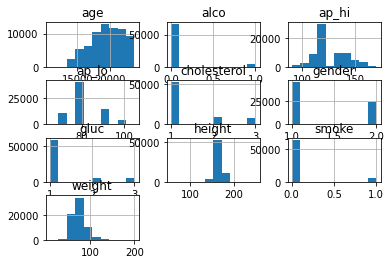

In [0]:
df.hist()

In [0]:
# # Split the data into 40% test and 60% training
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier


# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#df=pd.get_dummies(df)

# standardScaler = StandardScaler()
df=pd.get_dummies(df,columns=['cholesterol','gender','gluc','smoke','alco'])
# #columns_to_scale = ['age','height','weight','ap_hi','ap_lo']
# #df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(df, dataset.cardio, test_size=0.2, random_state=0)
#Lets use different algorithms to test the data.
# Train the classifier

# model.fit(df,dataset.cardio)


In [0]:
print(df.columns)

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco'],
      dtype='object')


In [0]:
#Lets use different algorithms to test the data.
# Train the classifier
model= RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# 

In [0]:
# Print the name and gini importance of each feature
feat_labels=list(df.columns)
for feature in zip(feat_labels, model.feature_importances_):
    print(feature)

('age', 0.3307507080686064)
('gender', 0.015847210164450832)
('height', 0.160169871265229)
('weight', 0.17807266635068758)
('ap_hi', 0.16708307431894773)
('ap_lo', 0.07703268823930276)
('cholesterol', 0.03761719133796655)
('gluc', 0.017137451616323816)
('smoke', 0.008726031352922464)
('alco', 0.007563107285562852)


In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(model)

# Train the selector
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=-1,
                                                 oob_score=False,


In [0]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
  
  print(feat_labels[feature_list_index])

age
height
weight
ap_hi


In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [0]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Apply The Full Featured Classifier To The Test Data
y_pred = model.predict(X_test) #0.7135127335690066

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.7134405887021138

In [0]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test) #0.6960536757809682

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.6801096601976769

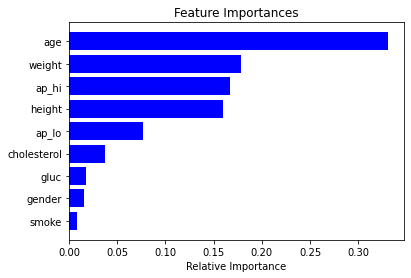

In [0]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier





In [0]:
# #for features extracted from the set.
# svc_scores1 = []
# kernels = [ 'linear','poly', 'rbf']
# for i in range(len(kernels)):
#     svc_classifier = SVC(kernel = kernels[i])
#     svc_classifier.fit(X_important_train, y_train)
#     svc_scores1.append(svc_classifier.score(X_important_test, y_test))

In [46]:
svc_scores = []
kernels = [ 'linear','poly', 'rbf']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

KeyboardInterrupt: ignored

In [44]:
for i in range(len(kernels)):
  print(kernels[i],":",svc_scores1[i])

IndexError: ignored

In [0]:
colors = rainbow(np.linspace(0, 10, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    print(i,"::",svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [0]:
for i in range(len(kernels)):
  print(kernels[i],":",svc_scores[i])

In [0]:
# for i in outliers:
#   if i in dataset["ap_lo"]:
    

  

In [0]:

# import sklearn as sk
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import tensorflow as tf
# #from tensorflow.examples.tutorials.mnist import input_data
# from sklearn.manifold import LocallyLinearEmbedding
# from sklearn.decomposition import PCA
# from sklearn.decomposition import IncrementalPCA
# from sklearn.decomposition import KernelPCA
# from sklearn.decomposition import SparsePCA
# from sklearn.manifold import MDS
# from sklearn.manifold import Isomap
# from sklearn.manifold import TSNE
# from sklearn.decomposition import TruncatedSVD
# from sklearn.random_projection import GaussianRandomProjection
# from sklearn.decomposition import FastICA
# from sklearn.decomposition import MiniBatchDictionaryLearning
# from sklearn.random_projection import SparseRandomProjection
# import keras
# from keras.models import Sequential, Model
# from keras.layers import Dense
# from keras.optimizers import Adam

In [0]:
# pca = PCA(n_components=12, whiten = False, random_state = 2019)
# X_pca = pca.fit_transform(dataset)
# X_pca_reconst = pca.inverse_transform(X_pca)


In [0]:
print(dataset.columns)

In [0]:
# plt.figure(figsize=(12,12))

# plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5,label='0')
# plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='1')
# plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], color='green', alpha=0.5,label='2')
# plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], color='black', alpha=0.5,label='3')
# plt.scatter(X_pca[y==4, 0], X_pca[y==4, 1], color='khaki', alpha=0.5,label='4')
# plt.scatter(X_pca[y==5, 0], X_pca[y==5, 1], color='yellow', alpha=0.5,label='5')
# plt.scatter(X_pca[y==6, 0], X_pca[y==6, 1], color='turquoise', alpha=0.5,label='6')
# plt.scatter(X_pca[y==7, 0], X_pca[y==7, 1], color='pink', alpha=0.5,label='7')
# plt.scatter(X_pca[y==8, 0], X_pca[y==8, 1], color='moccasin', alpha=0.5,label='8')
# plt.scatter(X_pca[y==9, 0], X_pca[y==9, 1], color='olive', alpha=0.5,label='9')
# plt.scatter(X_pca[y==10, 0], X_pca[y==10, 1], color='coral', alpha=0.5,label='10')
# plt.title("PCA")
# plt.ylabel('Les coordonnees de Y')
# plt.xlabel('Les coordonnees de X')
# plt.legend()
# plt.show()